In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### NOTE
Feature scaling should be performed for faster convergence in GD. 
In this tutorial, since we were comparing different methods, i didnt normalze features

## Data Preparation

In [4]:
df = pd.read_csv(r'./../helper/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
def add_intercept_to_x(X):
    X = np.concatenate([np.ones((X.shape[0],1)), X], axis = -1)
    return X



In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[['bathrooms']], df['price'])

Xtrain = add_intercept_to_x(Xtrain)
Xtest = add_intercept_to_x(Xtest)

## Solving LR 

In [86]:
def ols_closed_form(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta 

def calculate_rss(y, y_hat):
    error = ((y-y_hat)@(y-y_hat).T)/(2*y.shape[0])
    return error

## Closed Form

In [87]:
print('My implementation of closed form solution\n\n') 

theta_cf = ols_closed_form(Xtrain,ytrain)
print('theta/ coefficients are ', theta_cf)

rss_train = calculate_rss(Xtrain@theta_cf,ytrain)
print('train rss', rss_train)

y_hat_test = Xtest@theta_cf
rss_test = calculate_rss(ytest, y_hat_test)
print('test RSS', rss_test)

My implementation of closed form solution


theta/ coefficients are  [ 18182.48555688 246509.611834  ]
train rss 48483361641.22879
test RSS 49785743635.76496


## Gradient Descent

In [104]:
alpha = 0.01 
# epsilon = 1e-1


def one_gd_iteration(theta, X, y):
    theta = theta + (alpha/X.shape[0])*(X.T)@(y-X@theta)
    return theta
    
theta_gd = np.zeros((Xtrain.shape[-1]))

# while gradients>epsilon:
theta_list = []
cost_list = []
for epoch in range(100):
    theta_gd = one_gd_iteration(theta_gd, Xtrain, ytrain)
    theta_list.append(theta_gd)
    rss_gd = calculate_rss(ytrain, Xtrain@theta_gd)
    cost_list.append(rss_gd)

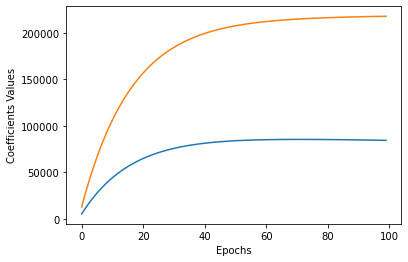

In [109]:
plt.plot(theta_list); 
plt.ylabel('Coefficients Values');
plt.xlabel('Epochs');

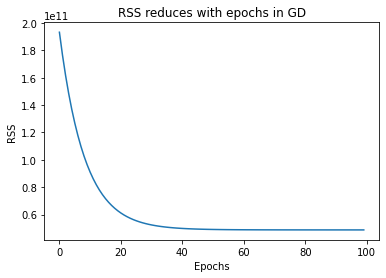

In [110]:
plt.plot(cost_list);
plt.ylabel('RSS');
plt.xlabel('Epochs');
plt.title('RSS reduces with epochs in GD');

## SK Learn

In [91]:
print('SKLearn\'s implementation \n\n') 

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_hat_train = lr.predict(Xtrain)

y_hat_test = lr.predict(Xtest)

print('theta, coefficients are ', lr.intercept_, lr.coef_)
print('train rss', mean_squared_error(ytrain, y_hat_train)/2) # rss = mse/2 as per our formulation
print('test rss', mean_squared_error(ytest, y_hat_test)/2)

SKLearn's implementation 


theta, coefficients are  18182.48555688071 [     0.       246509.611834]
train rss 48483361641.22879
test rss 49785743635.76495
